In [ ]:
pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 43kB/s 


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
#import the dataset from kaggle to google colab
#install kaggle API
! pip install -q kaggle

In [ ]:
#create a director as kaggle
! mkdir -p ~/.kaggle

In [ ]:
#import kaggle API
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [ ]:
#disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#list of data sets download from kaggle.com
! kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
imoore/60k-stack-overflow-questions-with-quality-rate               60k Stack Overflow Questions with Quality Rating     21MB  2020-09-06 23:43:03            357  
anikannal/solar-power-generation-data                               Solar Power Generation Data                           2MB  2020-08-18 15:52:03           2091  
ihelon/lego-minifigures-classification                              LEGO Minifigures Classification                      10MB  2020-09-06 16:42:41            429  
douglaskgaraujo/opportunity-insights-real-time-economic-tracker-us  Opportunity Insights real time Economic Tracker US   22MB  2020-09-07 18:23:07            174  
ruchi798/bookcro

In [ ]:
#import the data set
! kaggle datasets download -d mlg-ulb/creditcardfraud

 77% 51.0M/66.0M [00:00<00:00, 65.1MB/s]
100% 66.0M/66.0M [00:00<00:00, 104MB/s] 


In [ ]:
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
dataset = pd.read_csv('/content/creditcard.csv')

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.shape

(284807, 31)

In [ ]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
#check the null values in this data set
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#balance the data set
fraud = dataset[dataset['Class']==1]
non_fraud = dataset[dataset['Class']==0]

In [ ]:
fraud.shape , non_fraud.shape

((492, 31), (284315, 31))

In [ ]:
#random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [ ]:
non_fraud_t.shape

(492, 31)

In [ ]:
#merge the data set
dataset_1 = fraud.append(non_fraud_t, ignore_index=True)

In [ ]:
dataset_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,167722.0,-0.544137,0.972096,1.169717,1.375937,-0.593612,-0.257625,0.367890,0.429243,-0.018578,-0.729343,-1.208895,0.574189,-0.239360,0.074879,-1.089721,-0.885334,0.595637,-0.662115,1.047275,-0.106407,-0.315689,-0.833749,0.353221,0.383387,-0.829904,-1.035688,0.125629,0.158925,54.49,0
980,166032.0,-0.964736,0.880710,0.215103,-0.937315,0.757203,-0.557215,0.910238,-0.142064,0.007257,0.130764,0.185374,0.101091,-0.950286,0.354509,-0.940307,0.210189,-0.803621,0.011788,0.479862,-0.215549,-0.196628,-0.547175,0.028602,-0.517177,-0.557410,0.106464,-0.179852,0.236752,10.73,0
981,48699.0,1.128120,0.165296,0.217783,1.103735,-0.160325,-0.494607,0.160792,-0.079566,0.040937,-0.033745,-0.246017,0.041750,-0.454783,0.513464,1.224392,-0.218187,-0.121281,-0.539325,-0.738318,-0.127227,0.072897,0.185343,-0.097304,0.076416,0.586073,-0.301267,0.020243,0.022567,42.00,0
982,161738.0,-0.017987,0.378812,0.034789,-0.764863,1.232689,1.148340,0.570125,0.384941,-0.123371,-0.622260,0.762906,0.914768,-0.256183,0.194816,-0.973140,-1.143716,0.355597,-1.255115,-0.793352,-0.264413,0.321441,1.243913,-0.223805,-1.328850,-0.260583,0.751406,0.053648,-0.001170,9.02,0


In [ ]:
dataset_1['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
#matrix of features

x = dataset_1.drop(labels=['Class'], axis=1)
y = dataset_1['Class'] 

In [ ]:
x.shape , y.shape

((984, 30), (984,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split data into train and test set
x_train , x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
x_train.shape , x_test.shape

((787, 30), (197, 30))

In [ ]:
#apply feauture scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.69150682,  0.36356935, -0.3017874 , ..., -0.2039416 ,
        -0.21920397, -0.35528733],
       [-0.80704722,  0.50689565, -0.09182817, ...,  0.45094846,
         0.56347595, -0.47061421],
       [-0.84391872,  0.18932557,  0.10278419, ...,  0.30139012,
         0.42070516, -0.46959811],
       ...,
       [ 1.5733885 ,  0.84008004, -1.00283249, ..., -0.05305107,
        -0.1895322 , -0.3684119 ],
       [ 0.77898848,  0.40628305, -0.46228992, ...,  0.05677197,
         0.01660192, -0.43153685],
       [-0.44814244,  0.6696406 , -0.41713975, ..., -0.08228428,
        -0.12489256, -0.46959811]])

In [ ]:
x_test

array([[-0.38233908,  0.66805373, -0.65468529, ..., -0.02490843,
        -0.02187089, -0.39089302],
       [-1.25626015,  0.30387767, -0.2244036 , ...,  0.12118944,
        -0.17809068, -0.46739657],
       [-1.57174635,  0.17445493,  0.67047224, ...,  1.94177981,
         1.49175346, -0.46959811],
       ...,
       [-1.50895672, -0.43509488,  1.94006617, ...,  1.55672795,
         1.51422143, -0.46959811],
       [-0.60905516,  0.43961592, -0.61451746, ..., -0.22150884,
        -0.45986355, -0.19779247],
       [-1.05899555,  0.63762403, -0.64892265, ...,  0.01483072,
        -0.03580711, -0.26637894]])

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
x_train.shape , x_test.shape

((787, 30), (197, 30))

In [ ]:
#reshape data for tensorflow
x_train = x_train.reshape(787,30,1)
x_test = x_test.reshape(197,30,1)

In [ ]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

In [ ]:
#building the model
model = tf.keras.models.Sequential()

In [ ]:
#first layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same',activation='relu', input_shape=(30,1)))

#batch normalization
model.add(tf.keras.layers.BatchNormalization())

#maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
#add drop out layer
model.add(tf.keras.layers.Dropout(0.20))

In [ ]:
#first layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same',activation='relu'))

#batch normalization
model.add(tf.keras.layers.BatchNormalization())

#maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
#add drop out layer
model.add(tf.keras.layers.Dropout(0.30))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
#add first dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

#add drop out layer
model.add(tf.keras.layers.Dropout(0.30))

In [ ]:
#add second dense layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 64)             0

In [ ]:
#compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
#train
history = model.fit( x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 [==============================] - 0s 15ms/step - loss: 0.8585 - accuracy: 0.6048 - val_loss: 0.6538 - val_accuracy: 0.7766
Epoch 2/25
25/25 [==============================] - 0s 6ms/step - loss: 0.5839 - accuracy: 0.7078 - val_loss: 0.6200 - val_accuracy: 0.8477
Epoch 3/25
25/25 [==============================] - 0s 6ms/step - loss: 0.4925 - accuracy: 0.7891 - val_loss: 0.5878 - val_accuracy: 0.8528
Epoch 4/25
25/25 [==============================] - 0s 7ms/step - loss: 0.4182 - accuracy: 0.8310 - val_loss: 0.5556 - val_accuracy: 0.8680
Epoch 5/25
25/25 [==============================] - 0s 6ms/step - loss: 0.3733 - accuracy: 0.8526 - val_loss: 0.5175 - val_accuracy: 0.8579
Epoch 6/25
25/25 [==============================] - 0s 6ms/step - loss: 0.3555 - accuracy: 0.8513 - val_loss: 0.4800 - val_accuracy: 0.8782
Epoch 7/25
25/25 [==============================] - 0s 6ms/step - loss: 0.3482 - accuracy: 0.8653 - val_loss: 0.4432 - val_accuracy: 0.8832
Epoch 8/25
25/25 [=

In [ ]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print((y_pred[5])), print (y_test[5])

[1]
1


(None, None)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[105   1]
 [ 11  80]]


In [ ]:
acc_score = accuracy_score(y_test, y_pred)

In [ ]:
acc_score

0.9390862944162437

In [ ]:
def learning_curve (history, epoch):
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('ACCURACY SCORE MODEL')
  plt.xlabel('no of epochs')
  plt.ylabel('accuracy')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.imshow()

  #models 2
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('MODEL LOSS')
  plt.xlabel('EPOCHS')
  plt.ylabel('LOSS VALUE')
  plt.legend(['loss', 'val loss'], loc='upper left')
  plt.imshow()


TypeError: ignored

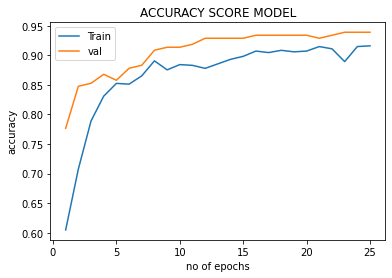

In [ ]:
learning_curve(history, 25)

In [ ]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

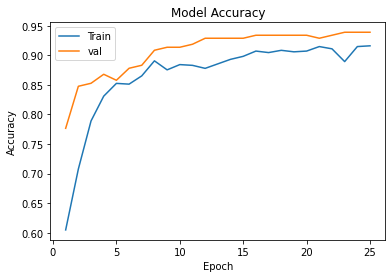

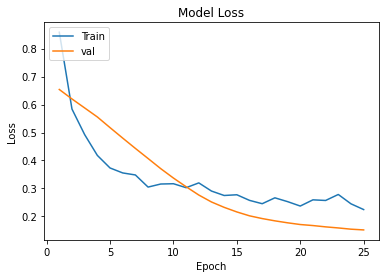

In [ ]:
learning_curve(history,25)